In [1]:
import math
# import matplotlib
import numpy as np
# import matplotlib.cm as cm
# import matplotlib.mlab as mlab
# import matplotlib.pyplot as plt
import pylab as plt

In [3]:
# for a given value of mu, 
# this function computes location of lagrange points
def locationLagrange(mu):
  l = 1-mu
    
  # for L1, L2, L3: solving quintic polynomial function of lagrange point positions.
  # Lagrange 1
  coefL1 = [1, 2*(mu-l), l**2 - 4*l*mu + mu**2, 2*mu*l*(l-mu) + mu - l, mu**2 * l**2 + 2*(l**2 + mu**2), mu**3 - l**3]
  L1roots = np.roots(coefL1) 
  L1 = 0
  for i in L1roots:
      if (i > -mu) and (i < l):
          L1 = i
  LP1 = [L1, 0]
    
  # Lagrange 2
  coefL2 = [1, 2*(mu-l), l**2 - 4*l*mu+mu**2, 2*mu*l*(l-mu) - (mu+l), mu**2 * l**2 + 2*(l**2 - mu**2), -(mu**3 + l**3)]
  L2roots = np.roots(coefL2)
  L2 = 0
  for i in L2roots:
      if (i > -mu) and (i > l):
          L2 = i
  LP2 = [L2, 0]
    
  # Lagrange 3
  coefL3 = [1, 2*(mu-l), l**2 - 4*mu*l+mu**2, 2*mu*l*(l-mu) + (l+mu), mu**2 * l**2 + 2*(mu**2 - l**2), l**3 + mu**3]
  L3roots = np.roots(coefL3)
  L3 = 0
  for i in L3roots:
      if (i < -mu):
          L3 = i
  LP3 = [L3, 0]

  # Lagrange 4
  LP4 = [0.5 - mu, math.sqrt(3)/2]
    
  # Lagrange 5
  LP5 = [0.5 - mu, -math.sqrt(3)/2]
    
  return LP1, LP2, LP3, LP4, LP5

In [4]:
# for a given value of x,y, and mu 
# this function computes jacobi constant Cj
def cr3bpJacobi(x, y, mu):
  r1 = np.sqrt((x+mu)**2 + y*y)
  r2 = np.sqrt((x-1+mu)**2 + y*y)
  return x**2 + y**2 + 2*((1-mu)/r1 + mu/r2) # n = 1

In [45]:
# plot ZVC of lagrange points
def plotLagrangeCj(mu):
  LP = locationLagrange(mu)
  Lx = [LP[0][0].real, LP[1][0].real , LP[2][0].real, LP[3][0], LP[4][0]]
  Ly = [i[1] for i in LP]

  CjL1 = cr3bpJacobi(Lx[0], Ly[0], mu)
  CjL2 = cr3bpJacobi(Lx[1], Ly[1], mu)
  CjL3 = cr3bpJacobi(Lx[2], Ly[2], mu)
  CjL = [CjL1, CjL2, CjL3]
  CjL.sort()
  # print([np.arange(CjL[0], CjL[1], 0.1), np.arange(CjL[1], CjL[2], 0.1)])
  # CjL = np.concatenate([np.arange(CjL[0], CjL[1], 0.1), np.arange(CjL[1], CjL[2], 0.1)])  
  
  # plot ZVC that run through L1, L2, L3
  delta = 0.025
  size=3.0
  x = np.arange(-size/2.0, size/2.0, delta)
  y = np.arange(-size/2.0, size/2.0, delta)
  X, Y = np.meshgrid(x, y)
  Z = cr3bpJacobi(X, Y, mu)
    
  plt.figure()
  plt.xlim(-size/2.0,size/2.0)
  plt.ylim(-size/2.0,size/2.0)
  CS = plt.contour(X, Y, Z, levels=np.arange(2.5, 6, 0.1), cmap='gray', extend='max') # contour for CjL
    
  # massive object
  plt.scatter([-mu], [0], marker='o', s=80, color='r', alpha=0.7)
  plt.text(-mu-0.1, -0.15, r'$m_1$')

  plt.scatter([1-mu], [0], marker='o', s=40, color='r', alpha=0.7)
  plt.text(1-mu-0.1, -0.15, r'$m_2$')

  plt.scatter(Lx, Ly, marker='.', s=40, color='b', alpha=0.8) # for labels
  # labels = [r'L$_1$', r'L$_2$', r'L$_3$', r'L$_4$', r'L$_5$']
  # for i in range(5):
  #     plt.text(Lx[i]-0.2, Ly[i]-0.05, labels[i])
  plt.text(Lx[0]-0.05, Ly[0]-0.15, r'L$_1$')
  plt.text(Lx[1]+0.05, Ly[1]-0.05, r'L$_2$')
  plt.text(Lx[2]-0.2, Ly[2]-0.05, r'L$_3$')
  plt.text(Lx[3]-0.05, Ly[3]+0.05, r'L$_4$')
  plt.text(Lx[4]-0.05, Ly[4]-0.15, r'L$_5$')

  # plt.axis('equal')
  # plt.axis('off')
  plt.colorbar(CS)  
  # plt.title('ZVC for Lagrange points')
  plt.show()
  # plt.savefig('ZVCLagrange.png')

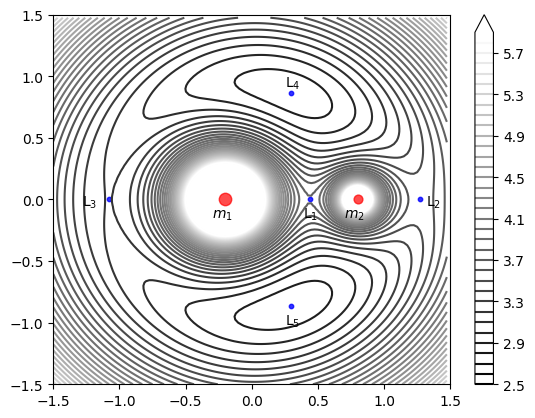

In [46]:
plotLagrangeCj(0.2)